## to get domain seq
* input: 

```('8615157868499', [['1388199497.030000', 'loc.map.baidu.com'], ['1388199474.678000', 'client.map.baidu.com']])```
* output:

```client.map.baidu.com loc.map.baidu.com```

In [2]:
input_path="/media/jw/5dccc50e-7c13-4186-bf6b-d894f02410be/result_jw/user_domain_flow"
output_path='/media/jw/5dccc50e-7c13-4186-bf6b-d894f02410be/result_jw/domain_data'

In [10]:
def join_distinct_list(li):
    str=''
    for i,domain in enumerate(li):
        if i==0:
            str=str+li[i]+' '
        elif li[i]==li[i-1]:
            pass
        else:
            str=str+li[i]+' '
    return str.strip()


for fname in os.listdir(input_path):
    if fname.startswith("part-"):
        fi=open(os.path.join(input_path, fname), mode='r',encoding="utf-8") 
        for line in fi.readlines():
            line=tuple(eval(line))
            if len(line)!=2:
                continue
            try:
                tmp=sorted(line[1],key=lambda l: float(str(l[0])))
            except:
                pass
            with open(os.path.join(output_path, fname), mode='a', encoding='utf-8') as fo:
        #         fo.write(' '.join([i[1] for i in tmp])+'\n')
                fo.write(join_distinct_list([i[1].split(":")[0] for i in tmp])+'\n')
        fi.close()

ValueError: could not convert string to float: "['1388244279.621000', 'dns.weixin.qq.com']"

## train a word2vec
* input: domain_data

```client.map.baidu.com loc.map.baidu.com```
* output:model-word2vec

```monitor.uu.qq.com -0.003459 -0.001384 -0.003676 0.002139 -0.004722 0.000682 0.002843 -0.001901 0.003471 0.002348 -0.000193 -0.003921 0.000865 0.004497 -0.003894 0.004958 0.001414 0.004182 -0.001125 -0.004657 0.000835 0.004116 -0.000095 -0.003578 -0.003982 0.003971 0.003855 0.002501 0.002137 -0.003359 0.002720 -0.003433 -0.000297 0.000109 0.002659 0.002966 -0.000975 -0.001353 0.004007 0.003263 0.003226 -0.001994 0.002135 -0.004421 0.003325 0.000021 0.000243 0.002711 -0.002844 -0.001345 -0.004296 0.001295 0.002124 -0.002261 -0.004481 -0.002293 -0.003195 -0.001187 0.003280 -0.003042 0.003973 0.003177 -0.000498 -0.000378 -0.000753 -0.004273 0.002578 0.001137 0.002161 0.000618 0.000697 -0.004914 -0.004877 0.002786 0.000019 0.004735 0.001274 -0.002370 -0.002219 -0.000442 -0.004202 0.001722 0.001433 -0.000560 -0.002201 -0.003625 0.001559 -0.002486 -0.000846 -0.001618 -0.002898 0.000449 -0.004796 0.004013 -0.001226 -0.004375 -0.004110 0.003417 -0.004163 0.000714```

In [ ]:
 # import modules & set up logging
 import gensim, logging
 import os
 logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

class MySentences(object):
    def __init__(self, dirname):
        self.dirname = dirname

    def __iter__(self):
        for fname in os.listdir(self.dirname):
            for line in open(os.path.join(self.dirname, fname)):
                yield line.split()

sentences = MySentences('/media/jw/5dccc50e-7c13-4186-bf6b-d894f02410be/result_jw/domain_data') # a memory-friendly iterator
model = gensim.models.Word2Vec(sentences,size=200, window=9, min_count=3, workers=500)
model.save_word2vec_format("/media/jw/5dccc50e-7c13-4186-bf6b-d894f02410be/result_jw/model/model-all-word2vec", fvocab="/media/jw/5dccc50e-7c13-4186-bf6b-d894f02410be/result_jw/model/model-all-vocabulary", binary=False)

/home/jw/anaconda3/lib/python3.5/site-packages/gensim/utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")
2016-11-15 16:43:34,782 : INFO : collecting all words and their counts
2016-11-15 16:43:34,783 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2016-11-15 16:43:35,227 : INFO : PROGRESS: at sentence #10000, processed 798656 words, keeping 10386 word types
2016-11-15 16:43:35,660 : INFO : PROGRESS: at sentence #20000, processed 1595086 words, keeping 14355 word types
2016-11-15 16:43:36,055 : INFO : PROGRESS: at sentence #30000, processed 2400561 words, keeping 17279 word types
2016-11-15 16:43:36,404 : INFO : PROGRESS: at sentence #40000, processed 3205864 words, keeping 19779 word types
2016-11-15 16:43:36,755 : INFO : PROGRESS: at sentence #50000, processed 4010719 words, keeping 21962 word types
2016-11-15 16:43:37,096 : INF

# adjust word2vec parameter

## prepare data into libsvm format
* input:model-word2vec

```monitor.uu.qq.com -0.003459 -0.001384 -0.003676 0.002139 -0.004722 0.000682 0.002843 -0.001901 0.003471 0.002348 -0.000193 -0.003921 0.000865 0.004497 -0.003894 0.004958 0.001414 0.004182 -0.001125 -0.004657 0.000835 0.004116 -0.000095 -0.003578 -0.003982 0.003971 0.003855 0.002501 0.002137 -0.003359 0.002720 -0.003433 -0.000297 0.000109 0.002659 0.002966 -0.000975 -0.001353 0.004007 0.003263 0.003226 -0.001994 0.002135 -0.004421 0.003325 0.000021 0.000243 0.002711 -0.002844 -0.001345 -0.004296 0.001295 0.002124 -0.002261 -0.004481 -0.002293 -0.003195 -0.001187 0.003280 -0.003042 0.003973 0.003177 -0.000498 -0.000378 -0.000753 -0.004273 0.002578 0.001137 0.002161 0.000618 0.000697 -0.004914 -0.004877 0.002786 0.000019 0.004735 0.001274 -0.002370 -0.002219 -0.000442 -0.004202 0.001722 0.001433 -0.000560 -0.002201 -0.003625 0.001559 -0.002486 -0.000846 -0.001618 -0.002898 0.000449 -0.004796 0.004013 -0.001226 -0.004375 -0.004110 0.003417 -0.004163 0.000714```
* output:sklean_input_data.txt

```7 1:-0.003459 2:-0.001384 3:-0.003676 4:0.002139 5:-0.004722 6:0.000682 7:0.002843 8:-0.001901 9:0.003471 10:0.002348 11:-0.000193 12:-0.003921 13:0.000865 14:0.004497 15:-0.003894 16:0.004958 17:0.001414 18:0.004182 19:-0.001125 20:-0.004657 21:0.000835 22:0.004116 23:-0.000095 24:-0.003578 25:-0.003982 26:0.003971 27:0.003855 28:0.002501 29:0.002137 30:-0.003359 31:0.002720 32:-0.003433 33:-0.000297 34:0.000109 35:0.002659 36:0.002966 37:-0.000975 38:-0.001353 39:0.004007 40:0.003263 41:0.003226 42:-0.001994 43:0.002135 44:-0.004421 45:0.003325 46:0.000021 47:0.000243 48:0.002711 49:-0.002844 50:-0.001345 51:-0.004296 52:0.001295 53:0.002124 54:-0.002261 55:-0.004481 56:-0.002293 57:-0.003195 58:-0.001187 59:0.003280 60:-0.003042 61:0.003973 62:0.003177 63:-0.000498 64:-0.000378 65:-0.000753 66:-0.004273 67:0.002578 68:0.001137 69:0.002161 70:0.000618 71:0.000697 72:-0.004914 73:-0.004877 74:0.002786 75:0.000019 76:0.004735 77:0.001274 78:-0.002370 79:-0.002219 80:-0.000442 81:-0.004202 82:0.001722 83:0.001433 84:-0.000560 85:-0.002201 86:-0.003625 87:0.001559 88:-0.002486 89:-0.000846 90:-0.001618 91:-0.002898 92:0.000449 93:-0.004796 94:0.004013 95:-0.001226 96:-0.004375 97:-0.004110 98:0.003417 99:-0.004163 100:0.000714
```

In [1]:
input_path='/media/jw/5dccc50e-7c13-4186-bf6b-d894f02410be/result_jw/category-big/category_domain'
input_word2vec_model='/media/jw/5dccc50e-7c13-4186-bf6b-d894f02410be/result_jw/model/model-all-word2vec'
output_data="/media/jw/5dccc50e-7c13-4186-bf6b-d894f02410be/result_jw/model/model-all-sklean_input_data.txt"

In [2]:
import os 
def getdic(dirname):
    domain_category={}
    for fname in os.listdir(dirname):
        if fname.startswith("part"):
            for line in open(os.path.join(dirname, fname)):
#                 print(type(eval(line)))
                domain_category[eval(line)[0].strip()]=eval(line)[1].strip()
    return domain_category
domain_category = getdic(input_path)

In [3]:
if os.path.exists(output_data):
    os.remove(output_data)
with open(input_word2vec_model,mode='r',encoding="utf-8") as infile:
    next(infile)
    for line in infile:
        b=[str(index)+":"+value for index,value in enumerate(line.split())]
        try:
            b[0]=domain_category[b[0].split(':')[1]]
            with open(output_data, mode='a', encoding='utf-8') as fw:
                # print(word_list)
                fw.write(" ".join(b)+'\n')
        except:
            print(b[0])

0:wap.
0:my-fun.cn
0:z
0:
0:4
0:�
0:�1���m[��!
0:)ofi��,
0:��c��q�ֿ
0:wml
0:type
0:ml
0:class=
0:.
0:im�6
0:.com
0:120.203.230
0:con
0:class230%230
0:63ppp


# sk-learn train

In [1]:
sklearn_input="/media/jw/5dccc50e-7c13-4186-bf6b-d894f02410be/result_jw/model/model-all-sklean_input_data.txt"
from sklearn.datasets import load_svmlight_file
X,y=load_svmlight_file(sklearn_input)

In [3]:
X[0]

<1x200 sparse matrix of type '<class 'numpy.float64'>'
	with 200 stored elements in Compressed Sparse Row format>

In [4]:
y

array([  2.,  14.,   8., ...,   4.,   4.,   4.])

In [5]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [6]:
from sklearn.linear_model import SGDClassifier
import numpy as np
SVM=SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, n_iter=5, random_state=42)
clf_SVM = SVM.fit(x_train, y_train)
doc_class_predicted = clf_SVM.predict(x_test)
print(np.mean(doc_class_predicted == y_test))
from sklearn import metrics
print(metrics.classification_report(y_test, doc_class_predicted))

0.766727526581
             precision    recall  f1-score   support

        0.0       0.12      0.02      0.04       170
        1.0       0.16      0.01      0.02       285
        2.0       0.24      0.05      0.09       134
        3.0       0.19      0.01      0.01       577
        4.0       0.78      0.99      0.87     14330
        5.0       0.69      0.20      0.31        45
        6.0       0.18      0.01      0.03      1304
        7.0       0.19      0.04      0.06       634
        8.0       0.00      0.00      0.00        89
        9.0       0.00      0.00      0.00        14
       10.0       0.00      0.00      0.00         8
       11.0       0.00      0.00      0.00         3
       14.0       0.12      0.01      0.02       101
       17.0       0.30      0.09      0.14        32
       18.0       0.18      0.03      0.05       328
       19.0       0.00      0.00      0.00        11
       20.0       0.00      0.00      0.00         7
       21.0       0.21      0.

/home/jw/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [7]:
>>> from sklearn import svm
>>> svc = svm.SVC(kernel='linear')
>>> model = svc.fit(x_train, y_train)  

predicted = model.predict(x_test)
print(np.mean(predicted == y_test))

from sklearn import metrics
print(metrics.classification_report(y_test, predicted))

0.770325421544
             precision    recall  f1-score   support

        0.0       0.17      0.01      0.01       170
        1.0       0.33      0.01      0.01       285
        2.0       0.25      0.01      0.01       134
        3.0       0.33      0.00      0.00       577
        4.0       0.77      1.00      0.87     14330
        5.0       0.84      0.36      0.50        45
        6.0       0.00      0.00      0.00      1304
        7.0       0.00      0.00      0.00       634
        8.0       0.00      0.00      0.00        89
        9.0       0.00      0.00      0.00        14
       10.0       0.00      0.00      0.00         8
       11.0       0.00      0.00      0.00         3
       14.0       0.00      0.00      0.00       101
       17.0       0.00      0.00      0.00        32
       18.0       0.00      0.00      0.00       328
       19.0       0.33      0.09      0.14        11
       20.0       0.00      0.00      0.00         7
       21.0       0.00      0.

/home/jw/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:

>>> from sklearn import svm
>>> svc = svm.SVC(kernel='poly',degree=3)
>>> model = svc.fit(x_train, y_train)  

predicted = model.predict(x_test)
print(np.mean(predicted == y_test))

from sklearn import metrics
print(metrics.classification_report(y_test, predicted))


In [ ]:

>>> from sklearn import svm
>>> svc = svm.SVC(kernel='rbf')
>>> model = svc.fit(x_train, y_train)  

predicted = model.predict(x_test)
print(np.mean(predicted == y_test))

from sklearn import metrics
print(metrics.classification_report(y_test, predicted))


In [ ]:

>>> from sklearn import svm
>>> svc = svm.SVC(kernel='rbf')
>>> model = MultinomialNB().fit(x_train, y_train)

predicted = model.predict(x_test)
print(np.mean(predicted == y_test))

from sklearn import metrics
print(metrics.classification_report(y_test, predicted))


In [ ]:
train_test_split?

# expolre

In [44]:
model.similarity('www.baidu.com','cn.bing.com')

0.19411735791092377

Populating the interactive namespace from numpy and matplotlib


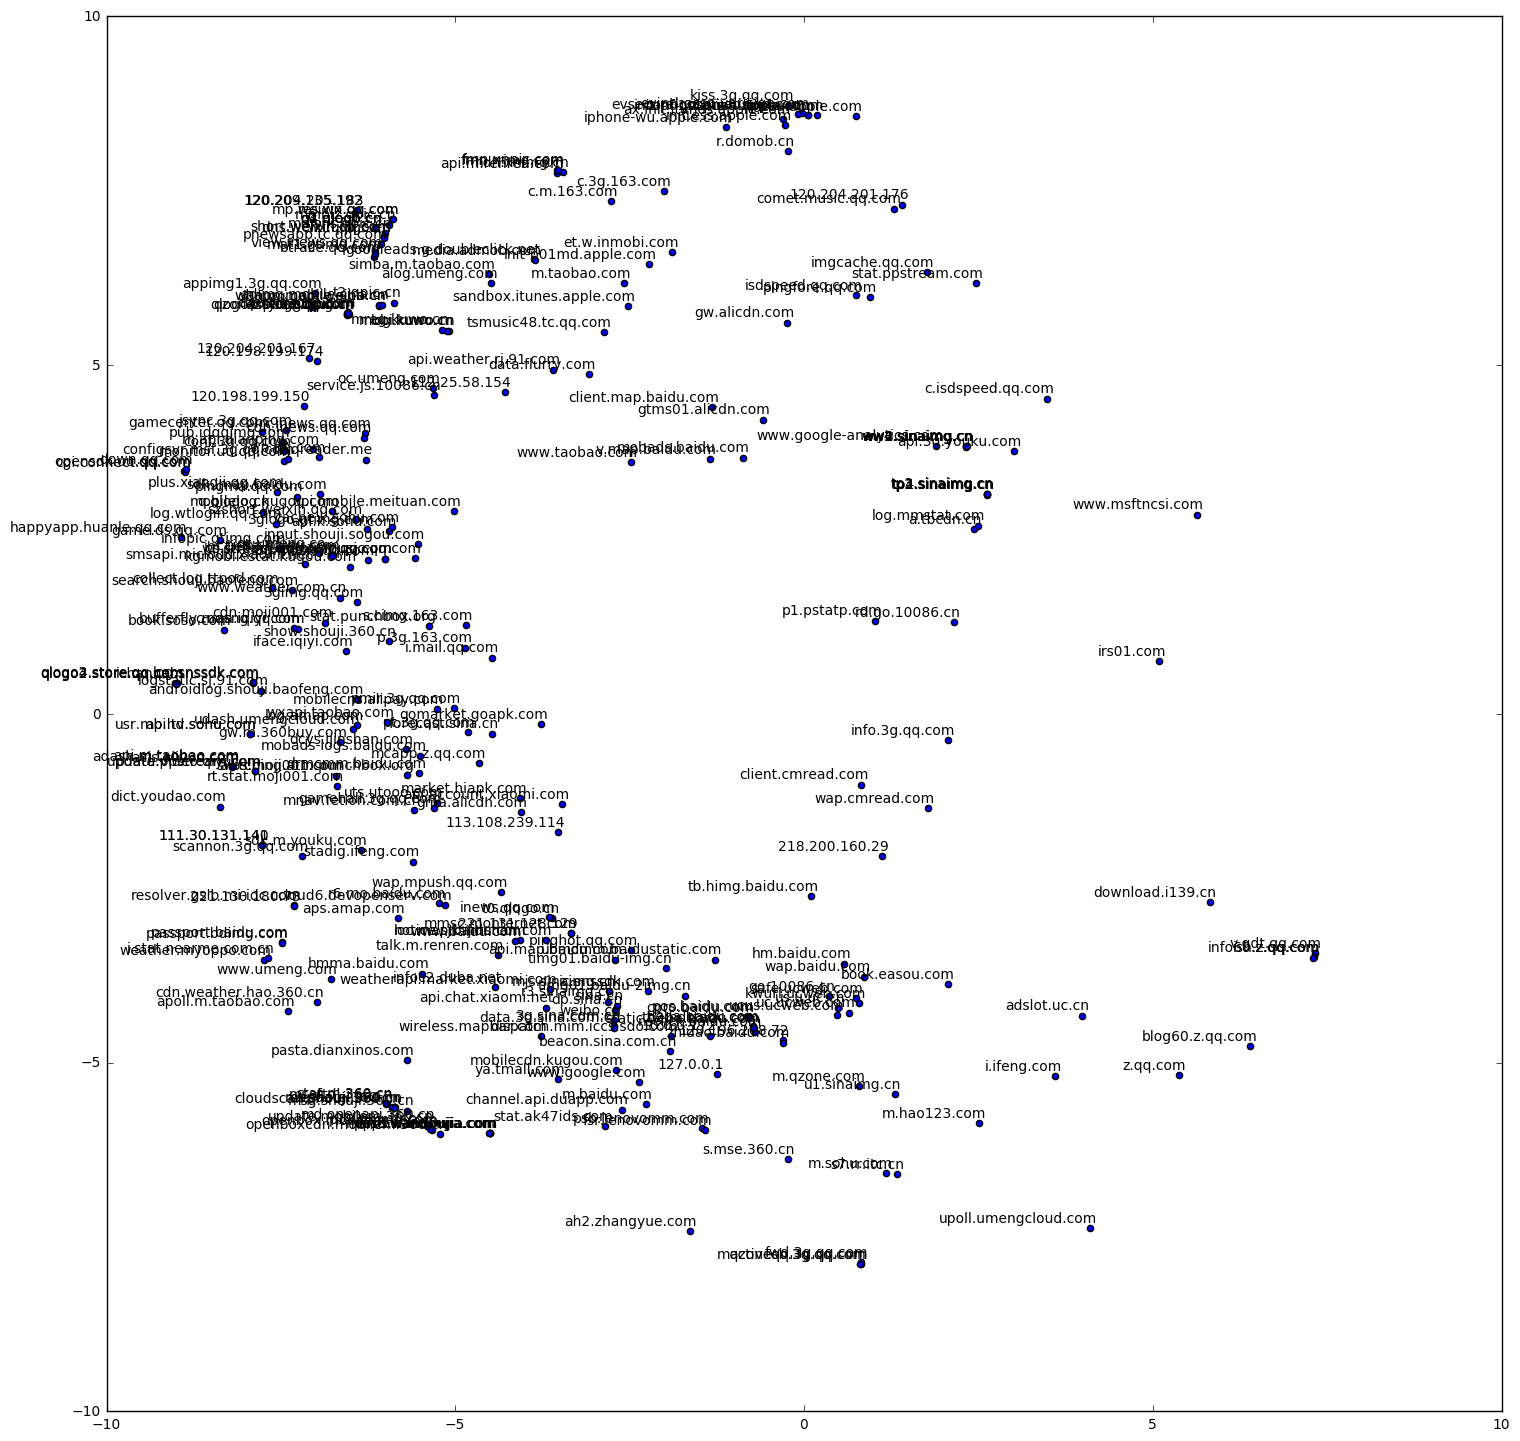

In [27]:
# Step 6: Visualize the embeddings.
%pylab inline
def plot_with_labels(low_dim_embs, labels, filename='tsne.png'):
  assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
  plt.figure(figsize=(18, 18))  #in inches
  for i, label in enumerate(labels):
    x, y = low_dim_embs[i,:]
    plt.scatter(x, y)
    plt.annotate(label,
                 xy=(x, y),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')

  plt.savefig(filename)

try:
  from sklearn.manifold import TSNE
  import matplotlib.pyplot as plt

  tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
  plot_only = 300
  final_embeddings=[model[word] for word in model.index2word]
  low_dim_embs = tsne.fit_transform(final_embeddings)
  labels = [model.index2word[i] for i in range(plot_only)]
  plot_with_labels(low_dim_embs, labels)

except ImportError:
  print("Please install sklearn and matplotlib to visualize embeddings.")


In [19]:
import gensim
model = gensim.models.Word2Vec.load_word2vec_format("/media/jw/5dccc50e-7c13-4186-bf6b-d894f02410be/result_jw/model/model-all-word2vec", fvocab="/media/jw/5dccc50e-7c13-4186-bf6b-d894f02410be/result_jw/model/model-all-vocabulary", binary=False)

In [ ]:
model = gensim.models.Word2Vec.load

# visual cluster 

In [51]:
# Step 6: Visualize the embeddings.
%pylab inline
def plot_with_labels(low_dim_embs, labels, filename='tsne.png'):
  assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
  plt.figure(figsize=(18, 18))  #in inches
  for i, label in enumerate(labels):
    x, y = low_dim_embs[i,:]
    plt.scatter(x, y)
    plt.annotate(label,
                 xy=(x, y),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')

  plt.savefig(filename)

try:
  from sklearn.manifold import TSNE
  import matplotlib.pyplot as plt

  tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
  plot_only = 300
  final_embeddings=[model[word] for word in model.index2word]
  low_dim_embs = tsne.fit_transform(final_embeddings)
  labels = [model.index2word[i] for i in range(plot_only)]
  plot_with_labels(low_dim_embs, labels)

except ImportError:
  print("Please install sklearn and matplotlib to visualize embeddings.")


Populating the interactive namespace from numpy and matplotlib


MemoryError: 

In [48]:
model.index2word[0]

'short.weixin.qq.com'

In [45]:
model.most_similar("www.baidu.com",topn=20)

[('www.baidu.com.cn', 0.7199355363845825),
 ('baidu.com', 0.6861908435821533),
 ('www.baidu.cn', 0.6000311374664307),
 ('ww.baidu.com', 0.5925023555755615),
 ('kve9.com', 0.5827379822731018),
 ('www.love288.com', 0.5723398327827454),
 ('www.wlan1000.com', 0.57198566198349),
 ('yesno.95178.com.cn', 0.5712428689002991),
 ('0gr', 0.5611317157745361),
 ('chinatravels.googlecode.com', 0.5446324348449707),
 ('www.evisushop.co.kr', 0.5381066203117371),
 ('42.51.146.203', 0.5368378162384033),
 ('update.hojy.com', 0.5364185571670532),
 ('fietk.com', 0.5270663499832153),
 ('testwebservice.wifiin.com', 0.5256537199020386),
 ('112.124.10.84', 0.5242650508880615),
 ('chinatravel.sinaapp.com', 0.5217097997665405),
 ('irising.me', 0.5183314085006714),
 ('rbrav.com', 0.5157033801078796),
 ('www.it3qc.com', 0.5128419399261475)]

In [26]:
model.most_similar("cn.bing.com",topn=20)

[('c.bing.com', 0.8871453404426575),
 ('cms.abmr.net', 0.8744900226593018),
 ('wap.bing.com', 0.8231924772262573),
 ('c.atdmt.com', 0.817481517791748),
 ('s4.cn.bing.net', 0.7864246368408203),
 ('bing.com', 0.7835617065429688),
 ('l.qidian.com', 0.7476742267608643),
 ('api.bing.com', 0.7452364563941956),
 ('wordchallenge.blob.core.windows.net', 0.734221339225769),
 ('dev.ditu.live.com', 0.7123168706893921),
 ('m.live.com', 0.7121649980545044),
 ('col.stj.s-msn.com', 0.7104863524436951),
 ('m2.cn.bing.com', 0.7081667184829712),
 ('info.dict.bing.com.cn', 0.690655529499054),
 ('tempuri.org', 0.6898121237754822),
 ('ads1.msads.net', 0.6865928769111633),
 ('www.compaq.com', 0.6723052859306335),
 ('dict.bing.com.cn', 0.6693139672279358),
 ('cdn.atdmt.com', 0.6641512513160706),
 ('view.atdmt.com', 0.6538106203079224)]

In [27]:
model.most_similar("pnewsapp.tc.qq.com",topn=20)

[('mat1.gtimg.com', 0.7971790432929993),
 ('short.weixin.qq.com', 0.7029921412467957),
 ('dns.weixin.qq.com', 0.6702858209609985),
 ('mmsns.qpic.cn', 0.6559640169143677),
 ('view.inews.qq.com', 0.6396231651306152),
 ('wx.qlogo.cn', 0.5896313190460205),
 ('btrace.qq.com', 0.576054573059082),
 ('mmbiz.qpic.cn', 0.5596198439598083),
 ('t2.qpic.cn', 0.5231893062591553),
 ('support.weixin.qq.com', 0.45459091663360596),
 ('t1.qpic.cn', 0.42877185344696045),
 ('res.wx.qq.com', 0.41201022267341614),
 ('mp.weixin.qq.com', 0.39361926913261414),
 ('__.qq.com', 0.3884463310241699),
 ('tsmusic24.tc.qq.com', 0.387741357088089),
 ('112.25.58.198', 0.38681137561798096),
 ('112.25.58.199', 0.3857235312461853),
 ('read.html5.qq.com', 0.3807867765426636),
 ('120.204.201.216', 0.3807080090045929),
 ('117.135.171.35', 0.380568265914917)]

In [32]:
model.most_similar("3g.music.qq.com",topn=20)

[('base.music.qq.com', 0.5211974382400513),
 ('bufferflytwo.qmsng.qq.com', 0.40229347348213196),
 ('weixin.music.qq.com', 0.38690194487571716),
 ('tj.wcd.qq.com', 0.3850199580192566),
 ('tsmusic320.tc.qq.com', 0.3266964852809906),
 ('www.51lingsheng.com', 0.320529580116272),
 ('s37.mysticalcard.com', 0.3197358250617981),
 ('www.hspk.com', 0.31323617696762085),
 ('data3.5sing.com', 0.3123437166213989),
 ('monitor.uu.qq.com', 0.31120914220809937),
 ('www.hairbobo.com', 0.3083556890487671),
 ('pay.video.qq.com', 0.3023170828819275),
 ('58.251.60.13', 0.3014127314090729),
 ('comet2.music.qq.com', 0.30122220516204834),
 ('data5.5sing.com', 0.2966516613960266),
 ('hxjh.cdn.gzyouai.com', 0.2947838604450226),
 ('data10.5sing.com', 0.2921476662158966),
 ('www.yaloe8009.com', 0.29100656509399414),
 ('data2.5sing.com', 0.28971707820892334),
 ('hz.wcd.qq.com', 0.28965169191360474)]

In [33]:
model.most_similar("pdata.video.qiyi.com",topn=20)

[('update.ppstream.com', 0.844956636428833),
 ('update.ppstv.com', 0.6975082159042358),
 ('update.ppstv.net', 0.6839422583580017),
 ('update.webscache.net', 0.6810566186904907),
 ('un4.managerment.net', 0.6700761318206787),
 ('13913833792-cmnet-33f557eb-d38c-442d-9fea-fb38cd163d19.nm.sdo.co',
  0.6005397439002991),
 ('images.symama.com', 0.5769270658493042),
 ('login.mxyol.net', 0.5385122299194336),
 ('121.14.199.138', 0.5060557126998901),
 ('backup.panda.sj.91.com', 0.5019014477729797),
 ('d2.tusuu.com', 0.4994606673717499),
 ('www.bridge69.com', 0.4937513470649719),
 ('mgm.meadjohnson.com.cn', 0.49101167917251587),
 ('xxgk.nju.edu.cn', 0.48803460597991943),
 ('15951993653-cmnet-3a126470-9319-4ad9-ae83-3131b2db0193.nm.sdo.co',
  0.4824506938457489),
 ('www.0707abc.com', 0.4819740653038025),
 ('down.myxuanfeng.com', 0.46964791417121887),
 ('192.168.20.1', 0.4598073363304138),
 ('www.dcpfb.com', 0.4541209638118744),
 ('r12---sn-i3b7sn7r.c.android.clients.google.com', 0.4525173306465149)

In [37]:
model.most_similar("loc.map.baidu.com",topn=20)

[('api.map.baidu.com', 0.5519472360610962),
 ('hmma.baidu.com', 0.49993813037872314),
 ('mpgame.elevensky.net', 0.47974154353141785),
 ('m.baidu.com', 0.47440409660339355),
 ('wuxian.baidu.com', 0.46715813875198364),
 ('ip.ws.126.net', 0.45728906989097595),
 ('dxt13v14g.3gking.net', 0.4561786651611328),
 ('channel.api.duapp.com', 0.450327605009079),
 ('dy.ugc.pps.tv', 0.4497770071029663),
 ('8.su.bdimg.com', 0.4378092885017395),
 ('rest.t68888.com', 0.43370309472084045),
 ('3.su.bdimg.com', 0.43081218004226685),
 ('static1.searchbox.baidu.com', 0.42442959547042847),
 ('lc.ops.baidu.com', 0.41042661666870117),
 ('wifiapi.micloud.xiaomi.net', 0.4013471305370331),
 ('ui01.coomoe.com', 0.39698535203933716),
 ('az.name19998.net', 0.3961797058582306),
 ('ui02.coomoe.com', 0.3958401083946228),
 ('ota.rhcloud.cn', 0.39504921436309814),
 ('t5.baidu.com', 0.3887232542037964)]

In [40]:
model.most_similar(positive=['loc.map.baidu.com', 'www.baidu.com'], negative=['wap.sogou.com'], topn=10)

[('m.baidu.com', 0.4702893793582916),
 ('www.baidu.com.cn', 0.4363114833831787),
 ('www.baidu.cn', 0.41866815090179443),
 ('dy.ugc.pps.tv', 0.411054790019989),
 ('aladdin.wapmap.baidu.com', 0.40640151500701904),
 ('m.klss.cn', 0.40155768394470215),
 ('59im.cn', 0.3971109390258789),
 ('static.st001.com', 0.38955363631248474),
 ('58.213.132.217', 0.38552385568618774),
 ('cdn01.baidu-img.cn', 0.384939044713974)]

In [39]:
model.most_similar("wap.soso.com",topn=20)

[('wap.sogou.com', 0.6553515791893005),
 ('dh.soso.com', 0.6018483638763428),
 ('m.sogou.com', 0.5914919376373291),
 ('dh.123.sogou.com', 0.5785199403762817),
 ('fwd.wap.soso.com', 0.5638918876647949),
 ('www.17lululu.com', 0.556369423866272),
 ('www.kimi.com.tw', 0.5135104060173035),
 ('img01.store.sogou.com', 0.49693286418914795),
 ('www.soso.com', 0.4841045141220093),
 ('www.ch999.com', 0.46927154064178467),
 ('iphoneapp.wup.3g.qq.com', 0.46323448419570923),
 ('15805194196-cmnet-1e8910f1-a6bd-4d26-928e-f1a57a0c1e7c.nm.sdo.co',
  0.46015268564224243),
 ('xm.soufun.com', 0.45996803045272827),
 ('haina.myapp.com', 0.4499272108078003),
 ('news2.wap.soso.com', 0.4496532678604126),
 ('dh.sogou.com', 0.44619220495224),
 ('img02.store.sogou.com', 0.44028240442276),
 ('ruyanrs.m.tmall.com', 0.4377552568912506),
 ('www.gk.8xmn.com', 0.4373786449432373),
 ('wlclick.soso.com', 0.4366161525249481)]

In [43]:
model.most_similar("api.m.taobao.com",topn=20)

[('adash.m.taobao.com', 0.90301513671875),
 ('acjs.aliyun.com', 0.7832961678504944),
 ('op.wangxin.taobao.com', 0.7738134264945984),
 ('aqcenter.taobao.com', 0.7033635377883911),
 ('www.etao.com', 0.5343584418296814),
 ('loc1.ditu.aliyun.com', 0.5170845985412598),
 ('m.simba.taobao.com', 0.5030553340911865),
 ('sentubila.m.tmall.com', 0.4582773745059967),
 ('13813957719-cmwap-ce75fc43-5adf-49de-96fa-ffa8ed9aedd8.nm.sdo.co',
  0.45247942209243774),
 ('cdndownload.alipay.com', 0.4475657343864441),
 ('api.xiami.com', 0.4369979798793793),
 ('download.alipay.com', 0.4367066025733948),
 ('mobilecns.alipay.com', 0.43552249670028687),
 ('gtms01.alicdn.com', 0.43154269456863403),
 ('i.mmcdn.cn', 0.4313429296016693),
 ('gw.alicdn.com', 0.4216208755970001),
 ('lcb.laiwang.com', 0.41904351115226746),
 ('m.taobao.com', 0.418618381023407),
 ('apoll.m.taobao.com', 0.4157992899417877),
 ('dock.m.taobao.com', 0.4128817617893219)]